In [2]:
import pandas as pd
from sklearn.datasets import load_iris
import numpy as np

In [3]:
iris = load_iris()

In [4]:
X, y = iris.data, iris.target

In [5]:
X.shape

(150, 4)

In [6]:
y.shape

(150,)

In [7]:
iris_data = pd.DataFrame(np.hstack((X, y.reshape(-1, 1))),index = range(X.shape[0]),columns=['sepal_length_cm','sepal_width_cm','petal_length_cm','petal_width_cm','class'] )

In [8]:
iris_data.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [13]:
iris_data[['sepal_length_cm','sepal_width_cm','petal_length_cm','petal_width_cm']].describe()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [21]:
iris_data['class']=iris_data['class'].map({0.0:'Iris-setosa',1.0:'Iris-versicolor',2.0:'Iris-virginica'})

In [22]:
iris_data.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


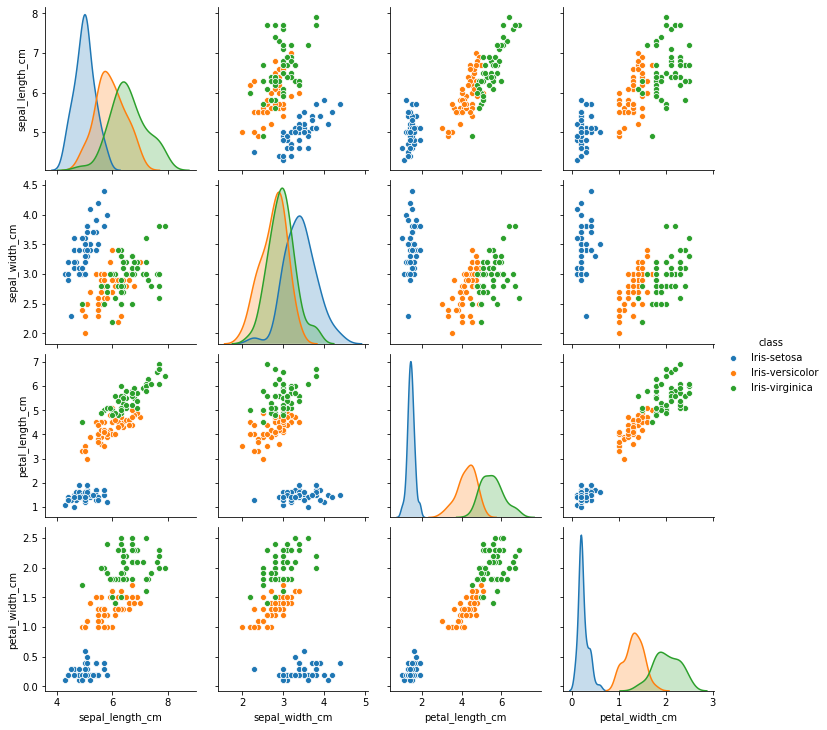

In [26]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sb

sb_sca=sb.pairplot(iris_data.dropna(), hue='class')

In [28]:
# fig = sb_sca.get_figure()
sb_sca.savefig('iris_data_scatter.png') #路径+文件名

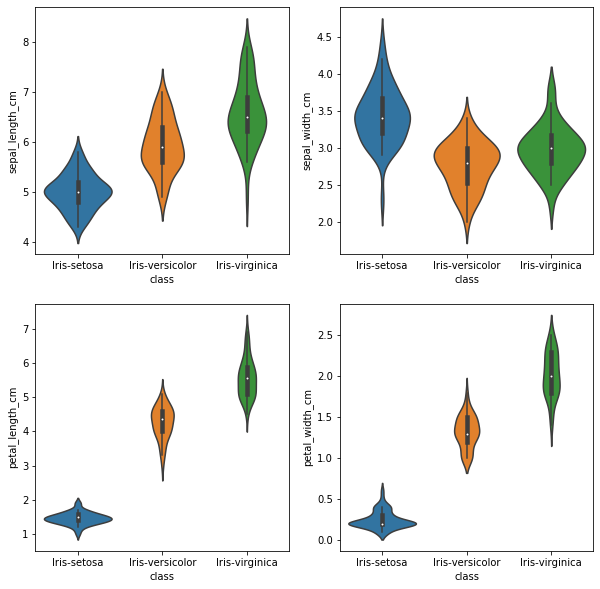

In [29]:
##小提亲图
fig=plt.figure(figsize=(10, 10))
for column_index, column in enumerate(iris_data.columns):
    if column == 'class':
        continue
    plt.subplot(2, 2, column_index + 1)
    sb.violinplot(x='class', y=column, data=iris_data)

In [32]:
fig.savefig('iris_data_dis.png')

In [38]:
from sklearn.model_selection import KFold, train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,roc_auc_score
from sklearn.metrics import classification_report


In [39]:
all_inputs = iris_data[['sepal_length_cm', 'sepal_width_cm',
                             'petal_length_cm', 'petal_width_cm']].values
all_classes = iris.target
Xtrain,Xtest,ytrain,ytest = train_test_split(all_inputs, all_classes, train_size=0.75, random_state=1)

In [40]:
from sklearn.svm import SVC

```py
C:惩罚系数，用来控制损失函数的惩罚系数，类似于LR中的正则化系数  float, optional (default=1.0),C越大，分类要求越严，C越小，可以有更大的错误容忍
kernel:核函数，核函数是用来将非线性问题转化为线性问题的一种方法，默认是“rbf”高斯核函数 其他的模式有linear、poly、sigmod
degree:当核函数是多项式核函数的时候，用来控制函数的最高次数。（多项式核函数是将低维的输入空间映射到高维的特征空间）int, optional (default=3)
gamma:核函数系数，默认是“auto”，即特征维度的倒数。控制模型复杂程度，越大模型越复杂，越小模型复杂程度越小
class_weight:与其他模型中参数含义一样，也是用来处理不平衡样本数据的，可以直接以字典的形式指定不同类别的权重，也可以使用balanced参数值。
```

In [55]:
clf = SVC(kernel='rbf')
param_test = {
    'C': [0.1,1,10,10000],
    'gamma':[0,0.1,1,10]
}
grid_search = GridSearchCV(estimator=clf, param_grid=param_test, scoring='accuracy', cv=5)
grid_search.fit(Xtrain, ytrain)
means = grid_search.cv_results_['mean_test_score']
params = grid_search.cv_results_['params']
for mean,param in zip(means,params):
    print("%f  with:   %r" % (mean,param))
print(grid_search.best_params_)
print(grid_search.best_score_)
model = grid_search.best_estimator_
# with open('./save/titanic/xgboost_titanic.pickle','wb') as f:
#     pickle.dump(model,f)
# with open('./save/titanic/xgboost_titanic.pickle','rb') as f:
#     model=pickle.load(f)

0.366071  with:   {'C': 0.1, 'gamma': 0}
0.866071  with:   {'C': 0.1, 'gamma': 0.1}
0.955357  with:   {'C': 0.1, 'gamma': 1}
0.375000  with:   {'C': 0.1, 'gamma': 10}
0.366071  with:   {'C': 1, 'gamma': 0}
0.973214  with:   {'C': 1, 'gamma': 0.1}
0.946429  with:   {'C': 1, 'gamma': 1}
0.910714  with:   {'C': 1, 'gamma': 10}
0.366071  with:   {'C': 10, 'gamma': 0}
0.973214  with:   {'C': 10, 'gamma': 0.1}
0.937500  with:   {'C': 10, 'gamma': 1}
0.901786  with:   {'C': 10, 'gamma': 10}
0.366071  with:   {'C': 10000, 'gamma': 0}
0.919643  with:   {'C': 10000, 'gamma': 0.1}
0.937500  with:   {'C': 10000, 'gamma': 1}
0.901786  with:   {'C': 10000, 'gamma': 10}
{'C': 1, 'gamma': 0.1}
0.9732142857142857


E:\software\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [56]:
ytest_predict=model.predict(Xtest)
print(model.score(Xtest,ytest)) ##0.9736842105263158
print(classification_report(ytest,ytest_predict))

0.9736842105263158
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.94      0.97        16
           2       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



In [63]:
from sklearn.model_selection import learning_curve

In [61]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=1,
                        train_sizes=np.linspace(.7, 1., 15), verbose=0, plot=True):
    """
    画出data在某模型上的learning curve.
    参数解释
    ----------
    estimator : 你用的分类器。
    title : 表格的标题。
    X : 输入的feature，numpy类型
    y : 输入的target vector
    ylim : tuple格式的(ymin, ymax), 设定图像中纵坐标的最低点和最高点
    cv : 做cross-validation的时候，数据分成的份数，其中一份作为cv集，其余n-1份作为training(默认为3份)
    n_jobs : 并行的的任务数(默认1)
    """
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, verbose=verbose)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    if plot:
        plt.figure()
        plt.title(title)
        if ylim is not None:
            plt.ylim(*ylim)
        plt.xlabel(u"训练样本数")
        plt.ylabel(u"得分")
        plt.gca().invert_yaxis()  # 纵坐标反向
        plt.grid()  # 设置网格线

        plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std,
                         alpha=0.1, color="b")
        plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std,
                         alpha=0.1, color="r")
        plt.plot(train_sizes, train_scores_mean, 'o-', color="b", label=u"训练集上得分")
        plt.plot(train_sizes, test_scores_mean, 'o-', color="r", label=u"测试/交叉验证集上得分")

        plt.legend(loc="best")

        plt.draw()
        plt.gca().invert_yaxis()
        plt.show()

    midpoint = ((train_scores_mean[-1] + train_scores_std[-1]) + (test_scores_mean[-1] - test_scores_std[-1])) / 2
    diff = (train_scores_mean[-1] + train_scores_std[-1]) - (test_scores_mean[-1] - test_scores_std[-1])
    return midpoint, diff

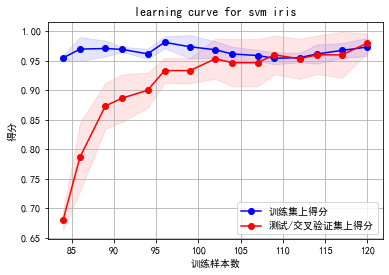

(0.9761393270156491, 0.024938517268407234)

In [66]:
plt.rcParams['font.sans-serif']=['SimHei'] #显示中文标签
plot_learning_curve(estimator=model, title='learning curve for svm iris', X=all_inputs, y=all_classes, ylim=None, cv=5, n_jobs=1,
                        train_sizes=np.linspace(.7, 1., 15), verbose=0, plot=True)